In [6]:
#SLR
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [7]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]) 

In [8]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [9]:
#Step 3:Create a Linear Regression model
model=LinearRegression()

In [10]:
#Step 4:Train the model using the dataset
model.fit(x,y)

LinearRegression()

In [13]:
#Step 5:Get the value of slope (m) and intercept (c) from trained model
print("Coefficient",model.coef_[0])
print("Intercept",model.intercept_)

Coefficient 4.965498141580591
Intercept 27.430065779800536


In [16]:
#Step 6:Display the equation of line
m=model.coef_[0]
c=model.intercept_
print(f'Equation of line: y = {m:.2f}x + {c:.2f}')

Equation of line: y = 4.97x + 27.43


In [17]:
#Step 7:Predict values using the model
y_pred=model.predict(x)
y_pred

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

In [18]:
y

array([32.48357077, 34.30867849, 43.23844269, 52.61514928, 48.82923313,
       53.82931522, 67.89606408, 68.83717365, 67.65262807, 77.71280022])

# Model Evaluation Metrics


In [29]:
#1.Measures average squared difference between actual and predicted values
mse=mean_squared_error(y,y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 11.75


In [30]:
#2.Measures average absolute difference between actual and predicted values
mae=mean_absolute_error(y,y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 2.87


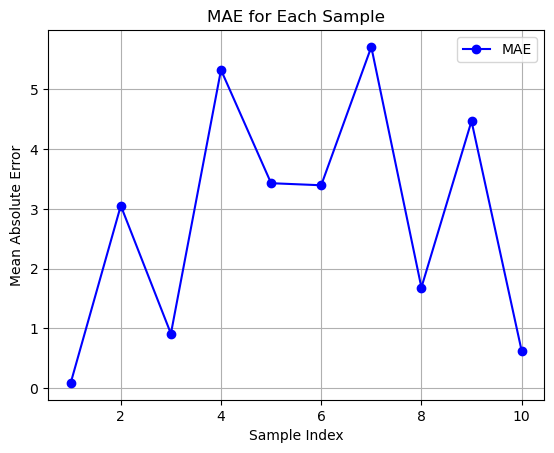

In [31]:
mae_values = np.abs(y - y_pred)  
plt.plot(range(1, len(y) + 1), mae_values, marker='o', linestyle='-', color='b', label="MAE")
plt.xlabel("Sample Index")
plt.ylabel("Mean Absolute Error")
plt.title("MAE for Each Sample")
plt.legend()
plt.grid(True)

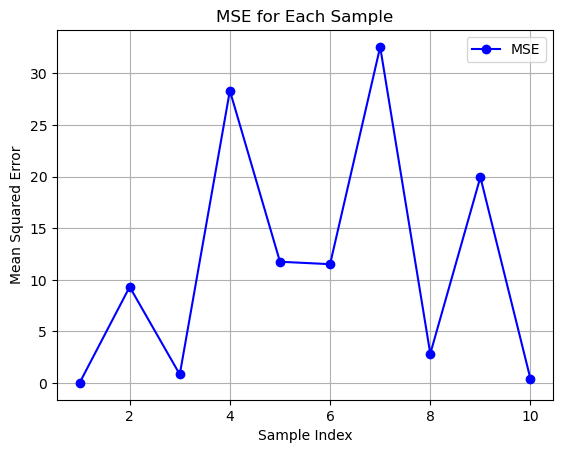

In [32]:
mse_values = (y - y_pred)**2 
plt.plot(range(1, len(y) + 1), mse_values, marker='o', linestyle='-', color='b', label="MSE")
plt.xlabel("Sample Index")
plt.ylabel("Mean Squared Error")
plt.title("MSE for Each Sample")
plt.legend()
plt.grid(True)

In [33]:
#3.RMSE - Measures standard deviation of residuals (errors)
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 3.43


In [34]:
#4.R2-Score - Represent how well the model fits the data (0 to 1,where 1 is best)
r2=r2_score(y,y_pred)
print(f'R-Squared: {r2:.2f}')

R-Squared: 0.95


In [36]:
#5.Adjusted R-squared (R2_adj) - Adjusted for the number of predictors, better for multiple regression
n=len(y) #Number of observations
p=1 #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2:.2f}')

Adjusted R-squared: 0.94


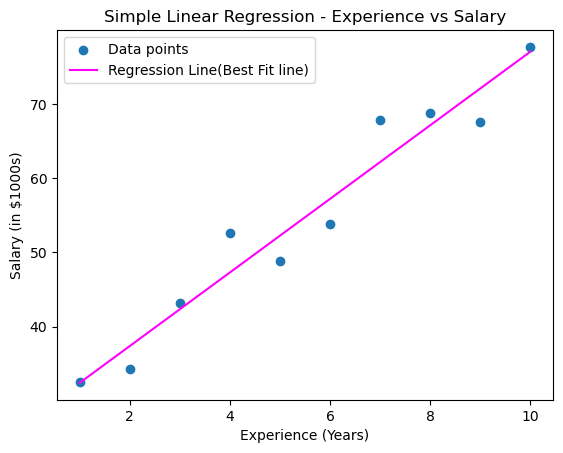

In [51]:
#Step 8:Plot the actual data points
scatter = plt.scatter(x,y,label='Data points')
#Step 9:Plot the regression line
slope_of_best_fit = plt.plot(x,y_pred,color='magenta',label='Regression Line(Best Fit line)')
#Step 10:Add labels and legend
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (in $1000s)')
plt.title('Simple Linear Regression - Experience vs Salary')
plt.legend()
#Step 11:Display the graph
plt.show(slope_of_best_fit)

# Prediction

In [50]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp=float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f'Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}k')
    except ValueError:
        print('Please enter a valid number!')


Enter years of experience to predict salary (or -1 to exit): 7


Predicted Salary for 7.0 years of experience: $62.19k



Enter years of experience to predict salary (or -1 to exit): 10


Predicted Salary for 10.0 years of experience: $77.09k



Enter years of experience to predict salary (or -1 to exit): -1


# Steps
**Step 1: Import necessary libraries**

**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**

**Step 3: Creating a Linear Regression Model**

**Step 4: Training the model using data set**

**Step 5: Get the values of slope and intercept from the trained model**

**Step 6: Display the equation of the line**

**Step 7: Predit values using the model**

**Step 8: Plot the regression line**

**Step 9: Prediction Features**

In [56]:
import statsmodels.api as sm  # For OLS Regression
from sklearn.preprocessing import PolynomialFeatures
 
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

x_poly = poly.fit_transform(x)  # Transforming X to polynomial features
 

In [59]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
x_ols = sm.add_constant(x_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(y, x_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:10:57   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
